In [1]:
from scipy.stats import binom, chi2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [16]:
parasitos = list(
    [
        (0, 1, 2, 3, 4, 5),
        (17, 81, 152, 180, 104, 16),
        (0, 0, 0, 0, 0)
    ]
)
ensayos = 550
n = 5
alfaChi2 = 0.05
probP = 0.517
parasitos[2] = [x/ensayos for x in parasitos[1]]

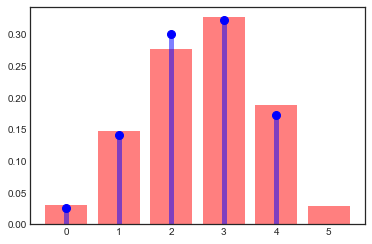

In [10]:
x = np.arange(
    binom.ppf(0.01, n, probP), 
    binom.ppf(0.99, n, probP)
)
curvaBinomial = binom.pmf(x, n, probP)

plt.style.use('seaborn-white')
plt.plot(x, curvaBinomial, 'bo', ms=8)
plt.vlines(x, 0, curvaBinomial, colors='b', lw=5, alpha=0.5)
plt.bar(parasitos[0], parasitos[2], color='r', alpha=0.5)
plt.show()

In [4]:
repeticiones = parasitos[0]
valoresObs = parasitos[1]
probMuestrar = parasitos[2]
tabla_histograma = list(zip(repeticiones,valoresObs))
print(tabulate(tabla_histograma, ['Repeticiones', 'Frecuencia Observadas'], tablefmt="github"))

|   Repeticiones |   Frecuencia Observadas |
|----------------|-------------------------|
|              0 |                      17 |
|              1 |                      81 |
|              2 |                     152 |
|              3 |                     180 |
|              4 |                     104 |
|              5 |                      16 |


In [6]:
probInt = []
probAcum = 0
for(i) in range(len(parasitos[1])):
    prob = binom.pmf(parasitos[0][i], n, probP)
    print('P(X = ', parasitos[0][i], ') = ', prob)
    probInt.append(prob)
    probAcum += prob

probAcum += prob
print("Acumulado Total = {m}".format(m=probAcum))

valores_esperados = []
for(i) in probInt:
    valores_esperados.append(i*ensayos)


P(X =  0 ) =  0.026286674882642996
P(X =  1 ) =  0.14068541319178504
P(X =  2 ) =  0.30117746840643006
P(X =  3 ) =  0.32237836680356996
P(X =  4 ) =  0.17253583399321495
P(X =  5 ) =  0.03693624272235701
Acumulado Total = 1.036936242722357


In [11]:
tableData = list(zip(repeticiones, valoresObs, probInt, valores_esperados))
print(tabulate(tableData, ['Repeticiones', 'Valores', 'Prob', 'Esperado'], tablefmt="github"))

|   Repeticiones |   Valores |      Prob |   Esperado |
|----------------|-----------|-----------|------------|
|              0 |        17 | 0.0262867 |    14.4577 |
|              1 |        81 | 0.140685  |    77.377  |
|              2 |       152 | 0.301177  |   165.648  |
|              3 |       180 | 0.322378  |   177.308  |
|              4 |       104 | 0.172536  |    94.8947 |
|              5 |        16 | 0.0369362 |    20.3149 |


In [13]:
chiDePrueba = 0
for(i) in range(len(valores_esperados)):
    chiDePrueba += ((valores_esperados[i] - valoresObs[i])**2)/valores_esperados[i]

print("Chi de Prueba = {m}".format(m=chiDePrueba))

Chi de Prueba = 3.572154069144677


In [17]:
chi2Critico = chi2.ppf(1-alfaChi2, len(valores_esperados)-1)

print("Chi2 Critico = {m}".format(m=chi2Critico))

Chi2 Critico = 11.070497693516351


In [18]:
if chiDePrueba > chi2Critico:
    print("Se rechaza la hipotesis nula")
else:
    print("No se puede rechazar la hipotesis nula")

No se puede rechazar la hipotesis nula
